# Fashion MNIST with Keras

## Overview

Fashion MNIST is an MNIST like dataset using images of clothing instead of hand-written digits. Each photo is 28x28 grayscale, with 10 different classes. The dataset contains 70000 images with 60000 for training and 10000 for testing.

## Download the dataset
download from Kaggle (https://www.kaggle.com/zalando-research/fashionmnist)

## Libraries Needed
We will be using Anaconda (python 3.6 or 3.5) and Keras with TensorFlow backend.

- <b>Anaconda</b> (https://www.youtube.com/watch?v=T8wK5loXkXg&t=9s)
- <b>TensorFlow</b> (https://www.youtube.com/watch?v=RplXYjxgZbw)
- <b>Keras</b> (```pip install keras```)

## Models

We'll be using models based on examples from Kaggle (https://www.kaggle.com/danialk/range-of-cnns-on-fashion-mnist-dataset)

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
train_df = pd.read_csv('fashion_train.csv')
test_df = pd.read_csv('fashion_test.csv')

train_df.shape

(1000, 785)

In [5]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [6]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

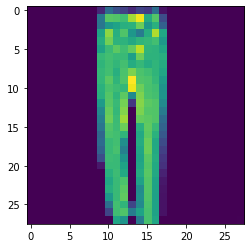

In [7]:
# lets see what the images look like

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

## Create the CNN

- <b>Define the model</b>
- <b>Compile the model</b>
- <b>Fit the model</b>

In [6]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [7]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [9]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 332us/step - loss: 0.7647 - acc: 0.7485 - val_loss: 0.4800 - val_acc: 0.8326
Epoch 2/10
48000/48000 [==============================] - 15s 314us/step - loss: 0.4506 - acc: 0.8427 - val_loss: 0.4063 - val_acc: 0.8634
Epoch 3/10
48000/48000 [==============================] - 15s 316us/step - loss: 0.3931 - acc: 0.8644 - val_loss: 0.3667 - val_acc: 0.8750
Epoch 4/10
48000/48000 [==============================] - 15s 320us/step - loss: 0.3642 - acc: 0.8746 - val_loss: 0.3504 - val_acc: 0.8822
Epoch 5/10
48000/48000 [==============================] - 16s 327us/step - loss: 0.3421 - acc: 0.8813 - val_loss: 0.3516 - val_acc: 0.8737
Epoch 6/10
48000/48000 [==============================] - 16s 330us/step - loss: 0.3279 - acc: 0.8845 - val_loss: 0.3188 - val_acc: 0.8889
Epoch 7/10
48000/48000 [==============================] - 16s 324us/step - loss: 0.3117 - acc: 0.8912 - val_loss: 0.

In [10]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2830
 test acc: 0.9025
